# Assignment :- 09, Assiciation Rule, Clustering

## 01) Book dataset

### Quick info about association rule :-
    Association rule mining is a technique to identify underlying relations between different items.
    Take an example of a Super Market where customers can buy variety of items. 
    Usually, there is a pattern in what the customers buy. For instance, mothers with babies buy baby products such as milk     and diapers. Damsels may buy makeup items whereas bachelors may buy beers and chips etc. In short, transactions involve    a pattern. More profit can be generated if the relationship between the items purchased in different transactions can be    identified.
Am going to use the Apriori Algorithm for Association Rule Mining bcose this have three major components of Apriori algorithm , this are follows as
        1)Support
        2)Confidence
        3)Lift
### Support
Support refers to the default popularity of an item and can be calculated by finding number of transactions containing a particular item divided by total number of transactions. Suppose we want to find support for item B. This can be calculated as:   Support(B) = (Transactions containing (B))/(Total Transactions)  
      Support(Ketchup) = 100/1000
                       = 10%

### Confidence
Confidence refers to the likelihood that an item B is also bought if item A is bought. It can be calculated by finding the number of transactions where A and B are bought together, divided by total number of transactions where A is bought. Mathematically, it can be represented as: 
Confidence(A→B) = (Transactions containing both (A and B))/(Transactions containing A)
Confidence(Burger→Ketchup) = 50/150
                           = 33.3%
### Lift
Lift(A -> B) refers to the increase in the ratio of sale of B when A is sold. Lift(A –> B) can be calculated by dividing Confidence(A -> B) divided by Support(B). Mathematically it can be represented as:
Lift(A→B) = (Confidence (A→B))/(Support (B))

Lift(Burger→Ketchup) = (Confidence (Burger→Ketchup))/(Support (Ketchup))

Lift(Burger→Ketchup) = 33.3/10
                     = 3.33

In [336]:
## important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

# Data loading 

In [86]:
book = pd.read_csv(r"D:\Data Science Material\Assignments\Association rule\book.csv")

In [87]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
books = book.copy()  # making copy of data for backup purpose

In [5]:
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [6]:
books.tail()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,0


In [7]:
books.shape

(2000, 11)

In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [9]:
books.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
books.duplicated().value_counts()

True     1680
False     320
dtype: int64

In [70]:
df = pd.get_dummies(books,drop_first=True)

## Data Visualization

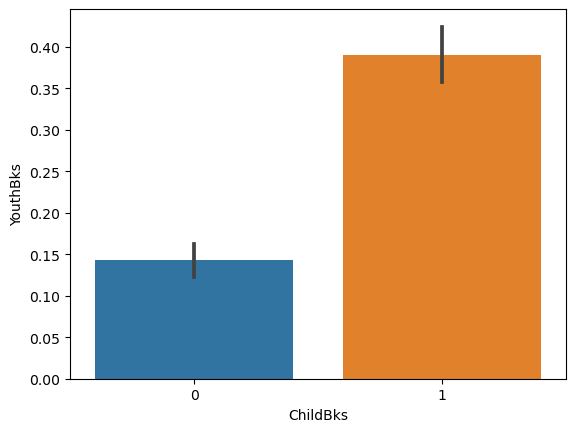

In [11]:
sns.barplot(x = 'ChildBks',y='YouthBks',data=books)
plt.show()

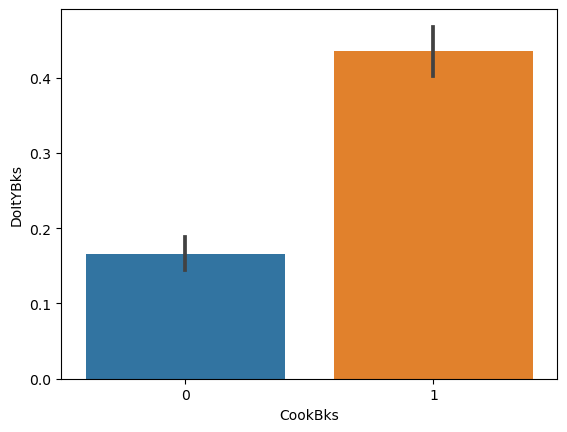

In [12]:
sns.barplot(x='CookBks',y='DoItYBks',data=books)
plt.show()

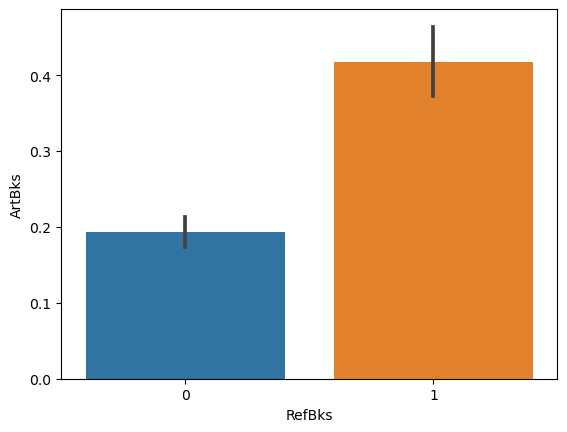

In [13]:
sns.barplot(x='RefBks',y='ArtBks',data=books)
plt.show()

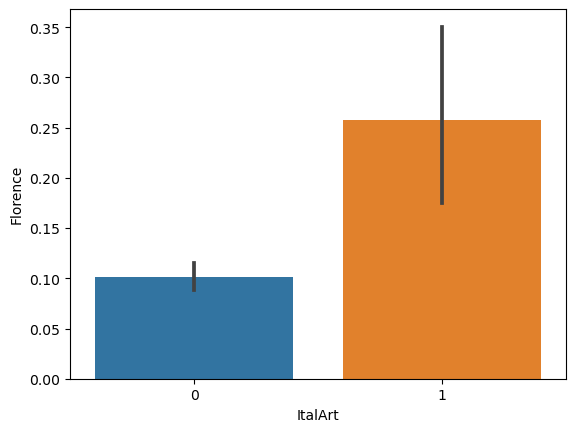

In [14]:
sns.barplot(x='ItalArt',y='Florence',data=books)
plt.show()

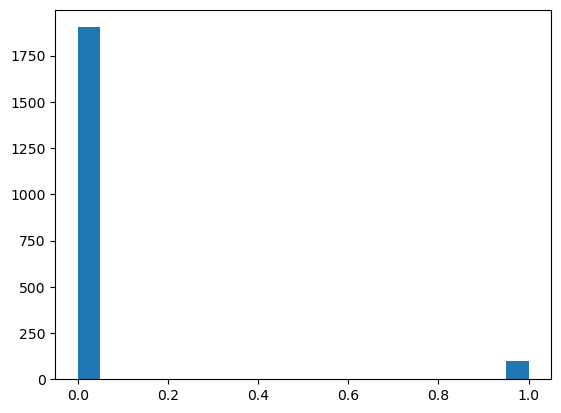

In [15]:
plt.hist(books.ItalArt,bins=20)
plt.show()

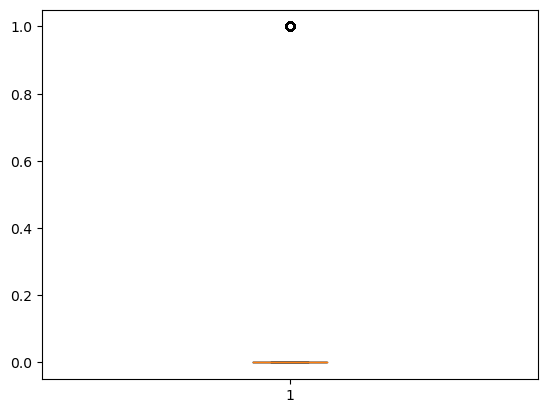

In [16]:
plt.boxplot(books.ItalCook,vert = True)
plt.show()

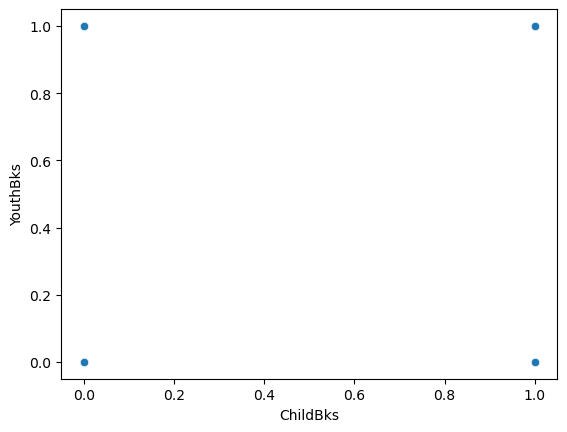

In [17]:
sns.scatterplot(x='ChildBks',y='YouthBks',data=books)
plt.show()

In [18]:
books.head(1)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0


# Apriori Algoritham
### Bcoz data is already is in transactional format

In [75]:

#frequent_itemsets = apriori(books, min_support=0.01,min_confidence=0.2, min_lift=1, min_length=2,use_colnames=True)
#association_results = list(frequent_itemsets)

'''min_support=0.01 = This parameter is used to select the items with support values greater than the value specified by the parameter
min_confidence=0.1 = parameter filters those rules that have confidence greater than the confidence threshold specified by the parameter.
min_lift=1 = parameter specifies the minimum lift value for the short listed rules
min_length=2 parameter specifies the minimum number of items that you want in your rules.is 2 since we want at least two products in our rules.'''



'min_support=0.01 = This parameter is used to select the items with support values greater than the value specified by the parameter\nmin_confidence=0.1 = parameter filters those rules that have confidence greater than the confidence threshold specified by the parameter.\nmin_lift=1 = parameter specifies the minimum lift value for the short listed rules\nmin_length=2 parameter specifies the minimum number of items that you want in your rules.is 2 since we want at least two products in our rules.'

In [76]:
df = pd.get_dummies(books)

In [77]:
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [373]:
frequent_itemsets = apriori(df, min_support=0.02,  use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
3225,(GeogBks),"(DoItYBks, ArtBks, ChildBks, CookBks, RefBks)",0.2760,0.0370,0.024,0.086957,2.350176,0.013788,1.054714
3226,(ArtBks),"(DoItYBks, GeogBks, ChildBks, CookBks, RefBks)",0.2410,0.0450,0.024,0.099585,2.213001,0.013155,1.060622
3227,(ChildBks),"(DoItYBks, GeogBks, ArtBks, CookBks, RefBks)",0.4230,0.0275,0.024,0.056738,2.063185,0.012368,1.030996
3228,(CookBks),"(DoItYBks, GeogBks, ArtBks, ChildBks, RefBks)",0.4310,0.0275,0.024,0.055684,2.024889,0.012148,1.029846


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [375]:
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2535,"(ItalAtlas, ChildBks, CookBks)","(RefBks, ItalCook)",0.0225,0.0465,0.0200,0.888889,19.115890,0.018954,8.581500
2554,"(RefBks, ItalCook)","(ItalAtlas, ChildBks, CookBks)",0.0465,0.0225,0.0200,0.430108,19.115890,0.018954,1.715236
1679,"(RefBks, ItalCook)","(ItalAtlas, CookBks)",0.0465,0.0285,0.0230,0.494624,17.355216,0.021675,1.922330
1674,"(ItalAtlas, CookBks)","(RefBks, ItalCook)",0.0285,0.0465,0.0230,0.807018,17.355216,0.021675,4.940864
2911,"(ArtBks, ItalCook)","(GeogBks, CookBks, ItalArt)",0.0565,0.0250,0.0240,0.424779,16.991150,0.022587,1.695000
2898,"(GeogBks, CookBks, ItalArt)","(ArtBks, ItalCook)",0.0250,0.0565,0.0240,0.960000,16.991150,0.022587,23.587500
2546,"(ItalAtlas, CookBks)","(ChildBks, RefBks, ItalCook)",0.0285,0.0415,0.0200,0.701754,16.909744,0.018817,3.213794
2543,"(ChildBks, RefBks, ItalCook)","(ItalAtlas, CookBks)",0.0415,0.0285,0.0200,0.481928,16.909744,0.018817,1.875221
2601,"(ChildBks, CookBks, ItalArt)","(ArtBks, ItalCook)",0.0300,0.0565,0.0285,0.950000,16.814159,0.026805,18.870000
2608,"(ArtBks, ItalCook)","(ChildBks, CookBks, ItalArt)",0.0565,0.0300,0.0285,0.504425,16.814159,0.026805,1.957321


In [425]:
rules[rules.lift<2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
2979,(CookBks),"(DoItYBks, ArtBks, ChildBks, RefBks, YouthBks)",0.4310,0.0265,0.0210,0.048724,1.838638,0.009579,1.023362
3046,"(DoItYBks, GeogBks, ArtBks, CookBks, YouthBks)",(ChildBks),0.0370,0.4230,0.0310,0.837838,1.980704,0.015349,3.558167
3103,(ChildBks),"(DoItYBks, GeogBks, ArtBks, CookBks, YouthBks)",0.4230,0.0370,0.0310,0.073286,1.980704,0.015349,1.039156
3108,"(GeogBks, ArtBks, ChildBks, RefBks, YouthBks)",(CookBks),0.0270,0.4310,0.0225,0.833333,1.933488,0.010863,3.414000


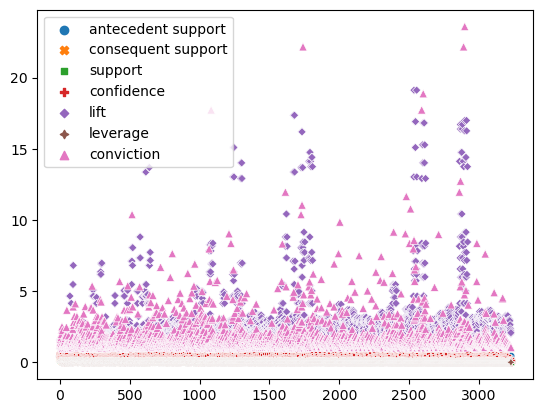

In [426]:
sns.scatterplot(data=rules)
plt.show()

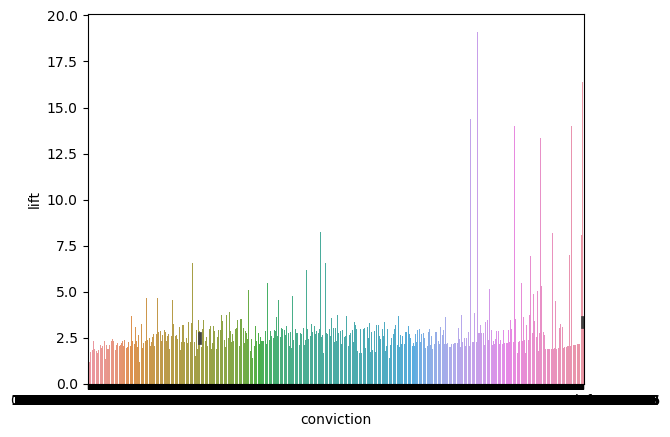

In [427]:
sns.barplot(x='conviction',y='lift',data=rules)
plt.show()
# This plot not making so much sence 

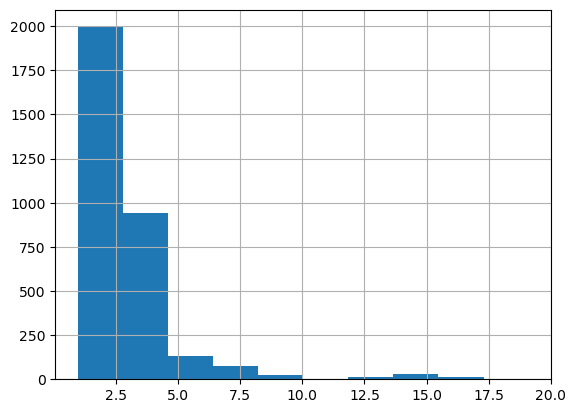

In [386]:
rules.lift.hist()
plt.show()

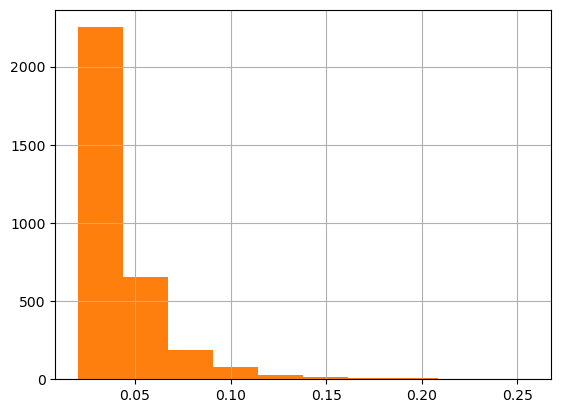

In [388]:
rules.support.hist()
plt.show()

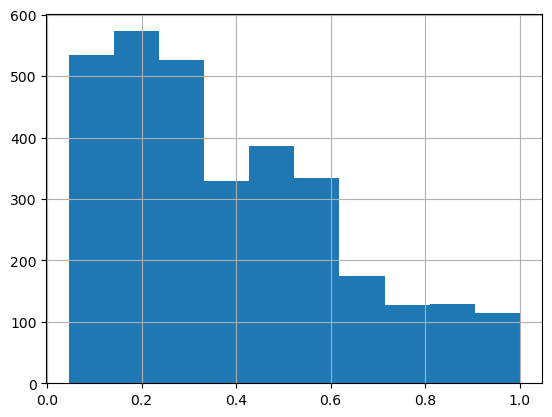

In [389]:
rules.confidence.hist()
plt.show()

# 02) My movie dataset

## Data loading 

In [402]:
my_movies = pd.read_csv("D:\Data Science Material\Assignments\Association rule\my_movies.csv")

In [403]:
my_movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [404]:
my_movie = my_movies.copy()  # making copy of data for backup purpose

In [405]:
my_movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [406]:
my_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [407]:
my_movie.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Analysis / Data cleaning 

In [408]:
my_movie.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

As we seen above in cols v4 adn v5 have maximum NAN values, out of 10 rows there are max 8 nd 9 rows respectively NAN, so we r drop this both cols.

In [409]:
my_movie.drop(['V4','V5'],inplace=True,axis=1)

In [410]:
my_movie.isna().sum()

V1               0
V2               0
V3               3
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

As we seen above , we have deleted V4 V5 cols, nd col V3 have least 3 NaN values, so we can replace it with most occuring values in this cols 

In [411]:
my_movie

,V1,V2,V3,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,1,1,0,0,0,0,0,1,0,1


In [289]:
my_movie.V3.value_counts().mode()

1

In [415]:
my_movie['V3'] = my_movie['V3'].fillna(my_movie.V3.value_counts().index[0])

In [416]:
my_movie

,V1,V2,V3,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,Sixth Sense,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,Sixth Sense,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,Sixth Sense,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,1,1,0,0,0,0,0,1,0,1


Here i replace NAN value with most occurence value in the cols

In [417]:
my_movie.isna().sum()

V1               0
V2               0
V3               0
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

Now there is a no any null value present in data set

# Visualization 

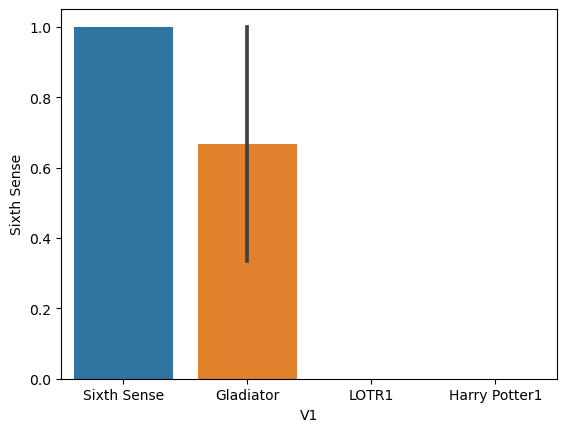

In [418]:
sns.barplot(x='V1',y='Sixth Sense',data=my_movie)
plt.show()

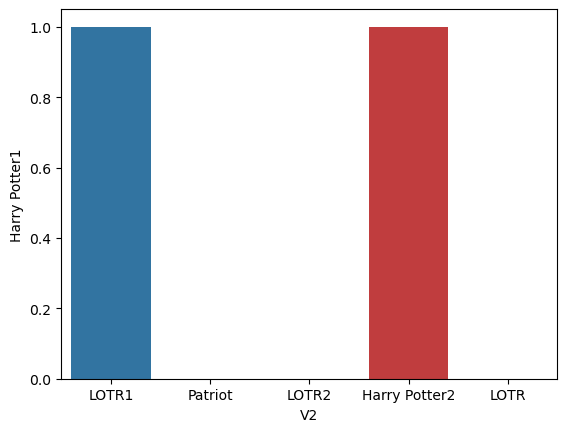

In [419]:
sns.barplot(x='V2',y='Harry Potter1',data=my_movie)
plt.show()

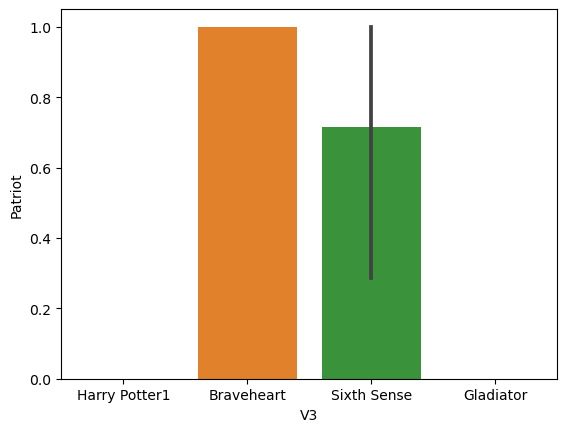

In [420]:
sns.barplot(x='V3',y='Patriot',data=my_movie)
plt.show()

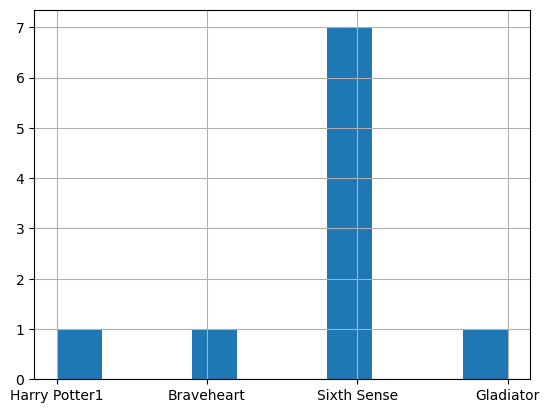

In [421]:
my_movie.V3.hist()
plt.show()

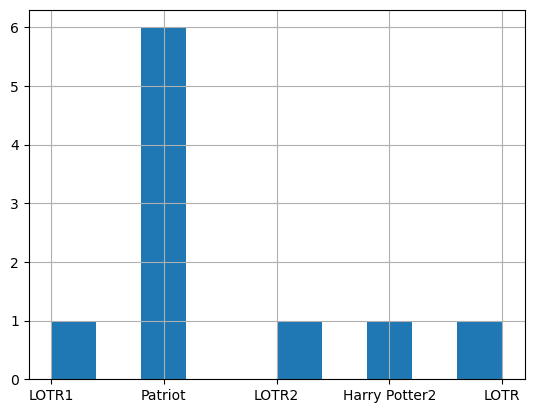

In [422]:
my_movie.V2.hist()
plt.show()

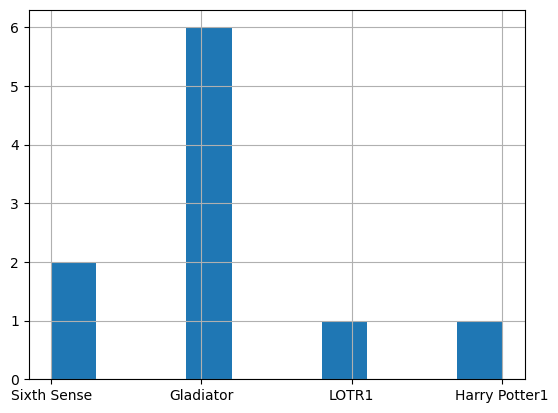

In [423]:
my_movie.V1.hist()
plt.show()

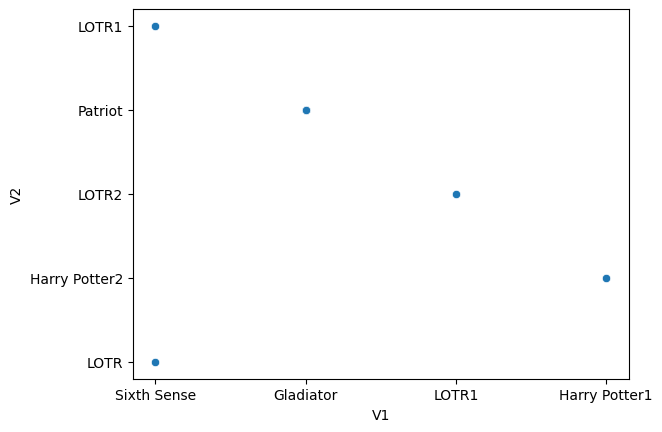

In [424]:
sns.scatterplot(x='V1',y='V2',data=my_movie)
plt.show()

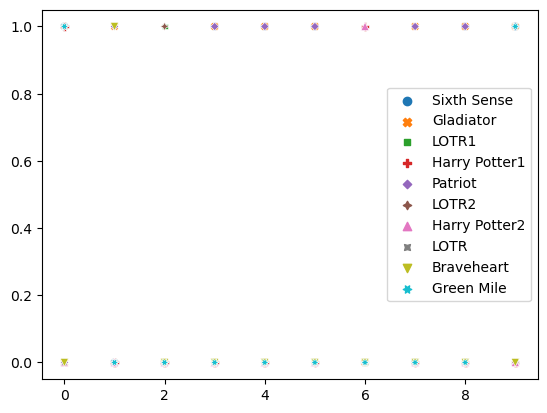

In [307]:
sns.scatterplot(data=my_movie)
plt.show()

In [308]:
my_movie.head(1)

,V1,V2,V3,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,1,0,1,1,0,1,0,0,0,1


## Preprocessing 
#### As the data is not in transaction formation We are using transaction Encoder

In [316]:
movie = pd.get_dummies(my_movie)
movie.head(3)

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense
0,1,0,1,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


## Apriori Algorithm

In [433]:
frequent_itemsets = apriori(movie, min_support=0.01,  use_colnames=True)
rules01 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)
rules01

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
9455,(Sixth Sense),"(Harry Potter1, V2_LOTR1, LOTR1, V3_Harry Pott...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
9456,(V3_Harry Potter1),"(Harry Potter1, V2_LOTR1, LOTR1, Sixth Sense, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
9457,(Green Mile),"(Harry Potter1, V2_LOTR1, LOTR1, Sixth Sense, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
9458,(LOTR2),"(Harry Potter1, V2_LOTR1, LOTR1, Sixth Sense, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [393]:
rules01.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4730,"(Patriot, V3_Braveheart, V1_Gladiator, Gladiator)",(Braveheart),0.1,0.1,0.1,1.0,10.0,0.09,inf
6935,"(LOTR1, V2_LOTR1)","(Green Mile, Sixth Sense, LOTR2, V3_Harry Pott...",0.1,0.1,0.1,1.0,10.0,0.09,inf
6937,"(V3_Harry Potter1, V2_LOTR1)","(Green Mile, LOTR1, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
4005,(V3_Harry Potter1),"(Green Mile, LOTR1, Sixth Sense, V1_Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
6938,"(Green Mile, V2_LOTR1)","(LOTR1, Sixth Sense, LOTR2, V3_Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
6939,"(LOTR2, V2_LOTR1)","(Green Mile, LOTR1, Sixth Sense, V3_Harry Pott...",0.1,0.1,0.1,1.0,10.0,0.09,inf
6940,"(LOTR1, Sixth Sense)","(Green Mile, V3_Harry Potter1, LOTR2, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
4001,"(V3_Harry Potter1, V1_Sixth Sense)","(Green Mile, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
4000,"(Green Mile, V3_Harry Potter1)","(LOTR1, Sixth Sense, V1_Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
6941,"(LOTR1, V3_Harry Potter1)","(Green Mile, Sixth Sense, LOTR2, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [397]:
rules01[rules01.lift>2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
48,(LOTR1),(Harry Potter1),0.2,0.2,0.1,0.5,2.5,0.06,1.6
49,(Harry Potter1),(LOTR1),0.2,0.2,0.1,0.5,2.5,0.06,1.6
50,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
51,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
52,(Green Mile),(LOTR1),0.2,0.2,0.1,0.5,2.5,0.06,1.6
...,...,...,...,...,...,...,...,...,...
9454,(LOTR1),"(Harry Potter1, V2_LOTR1, Sixth Sense, V3_Harr...",0.2,0.1,0.1,0.5,5.0,0.08,1.8
9456,(V3_Harry Potter1),"(Harry Potter1, V2_LOTR1, LOTR1, Sixth Sense, ...",0.1,0.1,0.1,1.0,10.0,0.09,inf
9457,(Green Mile),"(Harry Potter1, V2_LOTR1, LOTR1, Sixth Sense, ...",0.2,0.1,0.1,0.5,5.0,0.08,1.8
9458,(LOTR2),"(Harry Potter1, V2_LOTR1, LOTR1, Sixth Sense, ...",0.2,0.1,0.1,0.5,5.0,0.08,1.8


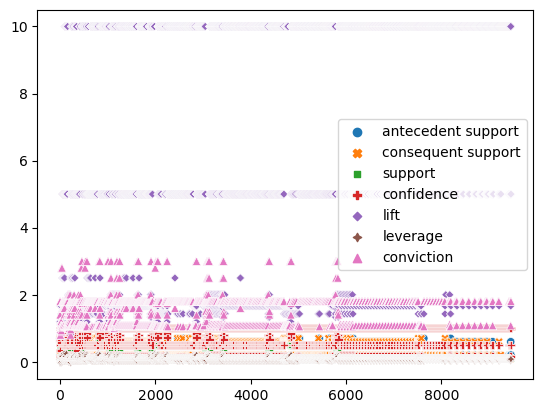

In [398]:
sns.scatterplot(data=rules01)
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


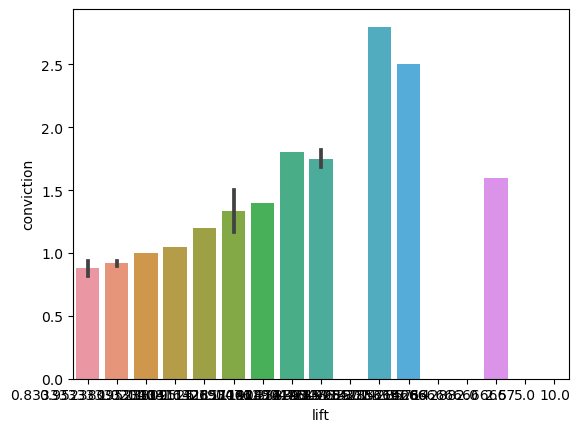

In [399]:
sns.barplot(x='lift',y='conviction',data=rules01)
plt.show()

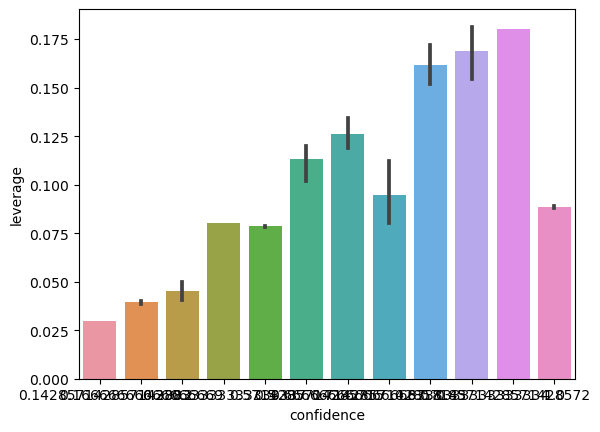

In [400]:
sns.barplot(x='confidence',y='leverage',data=rules01)
plt.show()

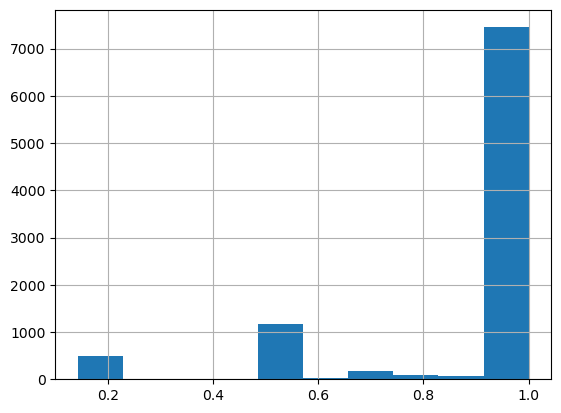

In [401]:
rules01.confidence.hist()
plt.show()